In [2]:
#importamos las librerías necesarias para trabajar
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from pmdarima.arima.utils import ndiffs
from statsmodels.graphics.tsaplots import acf, plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm
from sklearn.model_selection import train_test_split
import scipy.stats as stats
import statsmodels.api as sm

import datetime

In [3]:
def formato_fecha(df):
    fechas = []
    for i in range(0, len(df)):
        fecha = str(datetime.date(int(df["Anio"][i]), int(df["Mes"][i]), 1))
        fechas.append(fecha)
    
    df["Fechas"] = fechas

In [4]:
imp_com_id = pd.read_csv("DatosImportacionCombustibles.csv")
con_com_id = pd.read_csv("DatosConsumoCombustibles.csv")

In [5]:
imp_com_id

,Unnamed: 0,Anio,Mes,GasolinaSuper,GasolinaRegular,TotalGasolinas,Diesel,DieselLS,DieselULS,TotalDiesel,...,Solventes,Naftas,Ceras,Butano,PetroleoReconstit,MTBE,Orimulsion,MezclasOleosas,PetroleoCrudo,TotalMensual
0,3,2001,1,373963.96,177776.50,551740.46,566101.99,NaN,NaN,566101.99,...,NaN,NaN,NaN,NaN,715344.0,8402.0,NaN,NaN,NaN,2312639.05
1,4,2001,2,243091.07,123115.99,366207.06,489525.80,NaN,NaN,489525.80,...,NaN,NaN,NaN,NaN,370166.0,NaN,NaN,NaN,NaN,1769208.76
2,5,2001,3,312084.38,161726.42,473810.80,575559.68,NaN,NaN,575559.68,...,NaN,NaN,NaN,NaN,360530.0,NaN,NaN,NaN,NaN,1945770.26
3,6,2001,4,285054.89,127338.74,412393.63,437745.42,NaN,NaN,437745.42,...,NaN,NaN,NaN,NaN,359527.0,8184.0,NaN,NaN,NaN,1623637.76
4,7,2001,5,300913.67,168730.19,469643.86,552609.13,NaN,NaN,552609.13,...,NaN,NaN,NaN,NaN,723346.0,12680.0,NaN,NaN,NaN,2262726.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,316,2021,1,642652.37,626537.48,1269189.85,NaN,1185644.96,1499.38,1187144.34,...,13170.43,NaN,158.88,NaN,NaN,NaN,NaN,285.71,NaN,3448035.88
241,416,2021,2,726508.78,715261.34,1441770.12,NaN,1076824.67,1203.34,1078028.01,...,13709.49,2.85,597.30,NaN,NaN,NaN,NaN,1941.72,NaN,3309208.50
242,516,2021,3,850334.64,772750.01,1623084.65,NaN,1345110.18,13415.05,1358525.23,...,3207.39,48.00,329.90,NaN,NaN,NaN,NaN,1543.65,NaN,4151784.70
243,66,2021,4,1227173.53,634408.89,1861582.42,NaN,1250171.58,39568.59,1289740.17,...,18218.88,NaN,331.40,NaN,NaN,NaN,NaN,1008.98,191.0,4067846.94


In [6]:
con_com_id

,Unnamed: 0,Anio,Mes,GasolinaSuper,GasolinaRegular,TotalGasolinas,Diesel,DieselLS,DieselULS,TotalDiesel,...,AceitesLubricantes,GrasasLubricantes,Solventes,Naftas,Ceras,CrudoNacional,Butano,Orimulsion,MezclasOleosas,Total
0,3,2000,1,308156.82,202645.20,510802.02,634667.06,NaN,NaN,634667.06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1750544.64
1,4,2000,2,307766.31,205530.96,513297.27,642380.66,NaN,NaN,642380.66,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1773220.22
2,5,2000,3,331910.29,229499.56,561409.85,699807.25,NaN,NaN,699807.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909498.79
3,6,2000,4,315648.08,210680.40,526328.48,586803.98,NaN,NaN,586803.98,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800932.86
4,7,2000,5,319667.97,208164.34,527832.31,656948.20,NaN,NaN,656948.20,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1941771.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,194,2021,1,655503.47,685942.85,1341446.32,NaN,1220513.47,12064.41,1232577.88,...,28854.20,452.17,13958.41,88.32,NaN,108756.0,NaN,NaN,285.71,3507363.69
253,204,2021,2,621730.81,669313.36,1291044.17,NaN,1272593.63,10943.51,1283537.14,...,20240.35,709.18,9576.59,42.85,NaN,110937.0,NaN,NaN,NaN,3644007.36
254,214,2021,3,692228.61,679366.06,1371594.67,NaN,1417534.72,10508.49,1428043.21,...,27772.01,417.13,11000.25,95.13,NaN,104570.0,NaN,NaN,NaN,3862739.86
255,224,2021,4,610290.32,688389.15,1298679.47,NaN,1268514.31,9876.20,1278390.51,...,25691.62,441.80,12753.37,31.83,NaN,108795.0,NaN,NaN,83.00,3622666.65


In [7]:
imp_com = imp_com_id.drop(columns = "Unnamed: 0")
con_com = con_com_id.drop(columns = "Unnamed: 0")

In [8]:
imp_com

,Anio,Mes,GasolinaSuper,GasolinaRegular,TotalGasolinas,Diesel,DieselLS,DieselULS,TotalDiesel,GLP,...,Solventes,Naftas,Ceras,Butano,PetroleoReconstit,MTBE,Orimulsion,MezclasOleosas,PetroleoCrudo,TotalMensual
0,2001,1,373963.96,177776.50,551740.46,566101.99,NaN,NaN,566101.99,194065.74,...,NaN,NaN,NaN,NaN,715344.0,8402.0,NaN,NaN,NaN,2312639.05
1,2001,2,243091.07,123115.99,366207.06,489525.80,NaN,NaN,489525.80,170703.38,...,NaN,NaN,NaN,NaN,370166.0,NaN,NaN,NaN,NaN,1769208.76
2,2001,3,312084.38,161726.42,473810.80,575559.68,NaN,NaN,575559.68,161837.37,...,NaN,NaN,NaN,NaN,360530.0,NaN,NaN,NaN,NaN,1945770.26
3,2001,4,285054.89,127338.74,412393.63,437745.42,NaN,NaN,437745.42,163048.64,...,NaN,NaN,NaN,NaN,359527.0,8184.0,NaN,NaN,NaN,1623637.76
4,2001,5,300913.67,168730.19,469643.86,552609.13,NaN,NaN,552609.13,171518.86,...,NaN,NaN,NaN,NaN,723346.0,12680.0,NaN,NaN,NaN,2262726.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
240,2021,1,642652.37,626537.48,1269189.85,NaN,1185644.96,1499.38,1187144.34,475619.63,...,13170.43,NaN,158.88,NaN,NaN,NaN,NaN,285.71,NaN,3448035.88
241,2021,2,726508.78,715261.34,1441770.12,NaN,1076824.67,1203.34,1078028.01,617782.99,...,13709.49,2.85,597.30,NaN,NaN,NaN,NaN,1941.72,NaN,3309208.50
242,2021,3,850334.64,772750.01,1623084.65,NaN,1345110.18,13415.05,1358525.23,604151.98,...,3207.39,48.00,329.90,NaN,NaN,NaN,NaN,1543.65,NaN,4151784.70
243,2021,4,1227173.53,634408.89,1861582.42,NaN,1250171.58,39568.59,1289740.17,664443.94,...,18218.88,NaN,331.40,NaN,NaN,NaN,NaN,1008.98,191.0,4067846.94


In [9]:
con_com

,Anio,Mes,GasolinaSuper,GasolinaRegular,TotalGasolinas,Diesel,DieselLS,DieselULS,TotalDiesel,GLP,...,AceitesLubricantes,GrasasLubricantes,Solventes,Naftas,Ceras,CrudoNacional,Butano,Orimulsion,MezclasOleosas,Total
0,2000,1,308156.82,202645.20,510802.02,634667.06,NaN,NaN,634667.06,194410.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1750544.64
1,2000,2,307766.31,205530.96,513297.27,642380.66,NaN,NaN,642380.66,174710.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1773220.22
2,2000,3,331910.29,229499.56,561409.85,699807.25,NaN,NaN,699807.25,189234.07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1909498.79
3,2000,4,315648.08,210680.40,526328.48,586803.98,NaN,NaN,586803.98,174330.61,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1800932.86
4,2000,5,319667.97,208164.34,527832.31,656948.20,NaN,NaN,656948.20,191745.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1941771.90
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
252,2021,1,655503.47,685942.85,1341446.32,NaN,1220513.47,12064.41,1232577.88,472353.44,...,28854.20,452.17,13958.41,88.32,NaN,108756.0,NaN,NaN,285.71,3507363.69
253,2021,2,621730.81,669313.36,1291044.17,NaN,1272593.63,10943.51,1283537.14,440394.46,...,20240.35,709.18,9576.59,42.85,NaN,110937.0,NaN,NaN,NaN,3644007.36
254,2021,3,692228.61,679366.06,1371594.67,NaN,1417534.72,10508.49,1428043.21,509273.77,...,27772.01,417.13,11000.25,95.13,NaN,104570.0,NaN,NaN,NaN,3862739.86
255,2021,4,610290.32,688389.15,1298679.47,NaN,1268514.31,9876.20,1278390.51,458849.58,...,25691.62,441.80,12753.37,31.83,NaN,108795.0,NaN,NaN,83.00,3622666.65


In [10]:
con_com.columns

Index(['Anio', 'Mes', 'GasolinaSuper', 'GasolinaRegular', 'TotalGasolinas',
       'Diesel', 'DieselLS', 'DieselULS', 'TotalDiesel', 'GLP',
       'GasolinaAviacion', 'Kerosina', 'TurboJet', 'Bunker', 'Asfalto',
       'PetCoke', 'AceitesLubricantes', 'GrasasLubricantes', 'Solventes',
       'Naftas', 'Ceras', 'CrudoNacional', 'Butano', 'Orimulsion',
       'MezclasOleosas', 'Total'],
      dtype='object')

In [11]:
imp_com.columns

Index(['Anio', 'Mes', 'GasolinaSuper', 'GasolinaRegular', 'TotalGasolinas',
       'Diesel', 'DieselLS', 'DieselULS', 'TotalDiesel', 'GLP',
       'GasolinaAviacion', 'Kerosina', 'TurboJet', 'Bunker', 'Asfalto',
       'PetCoke', 'AceitesLubricantes', 'GrasasLubricantes', 'Solventes',
       'Naftas', 'Ceras', 'Butano', 'PetroleoReconstit', 'MTBE', 'Orimulsion',
       'MezclasOleosas', 'PetroleoCrudo', 'TotalMensual'],
      dtype='object')

### Removemos todas las columnas que no vamos a utilizar

In [12]:
data_con = con_com.drop(columns = ['GLP',
       'GasolinaAviacion', 'Kerosina', 'TurboJet', 'Bunker', 'Asfalto',
       'PetCoke', 'AceitesLubricantes', 'GrasasLubricantes', 'Solventes',
       'Naftas', 'Ceras', 'CrudoNacional', 'Butano', 'Orimulsion',
       'MezclasOleosas', 'DieselULS', 'TotalGasolinas', "Total", "TotalDiesel"])

data_imp = imp_com.drop(columns = ['GLP',
       'GasolinaAviacion', 'Kerosina', 'TurboJet', 'Bunker', 'Asfalto',
       'PetCoke', 'AceitesLubricantes', 'GrasasLubricantes', 'Solventes',
       'Naftas', 'Ceras', 'Butano', 'PetroleoReconstit', 'MTBE', 'Orimulsion',
       'MezclasOleosas', 'PetroleoCrudo', 'DieselULS', 'TotalGasolinas', "TotalMensual", "TotalDiesel"])

In [13]:
data_con

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,DieselLS
0,2000,1,308156.82,202645.20,634667.06,NaN
1,2000,2,307766.31,205530.96,642380.66,NaN
2,2000,3,331910.29,229499.56,699807.25,NaN
3,2000,4,315648.08,210680.40,586803.98,NaN
4,2000,5,319667.97,208164.34,656948.20,NaN
...,...,...,...,...,...,...
252,2021,1,655503.47,685942.85,NaN,1220513.47
253,2021,2,621730.81,669313.36,NaN,1272593.63
254,2021,3,692228.61,679366.06,NaN,1417534.72
255,2021,4,610290.32,688389.15,NaN,1268514.31


In [14]:
data_imp

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,DieselLS
0,2001,1,373963.96,177776.50,566101.99,NaN
1,2001,2,243091.07,123115.99,489525.80,NaN
2,2001,3,312084.38,161726.42,575559.68,NaN
3,2001,4,285054.89,127338.74,437745.42,NaN
4,2001,5,300913.67,168730.19,552609.13,NaN
...,...,...,...,...,...,...
240,2021,1,642652.37,626537.48,NaN,1185644.96
241,2021,2,726508.78,715261.34,NaN,1076824.67
242,2021,3,850334.64,772750.01,NaN,1345110.18
243,2021,4,1227173.53,634408.89,NaN,1250171.58


### Unimos los datos de Dieseil y Diesel Bajo en Azufre

In [15]:
def agregar_diesel(df):
    for i in range(0, len(df)):
        if df["Anio"][i] == 2018 or df["Anio"][i] == 2019 or df["Anio"][i] == 2020 or df["Anio"][i] == 2021:
            df["Diesel"][i] = df["DieselLS"][i]
        else:
            df["Diesel"][i] == df["Diesel"][i]

In [16]:
agregar_diesel(data_con)
agregar_diesel(data_imp)

<ipython-input-15-58d6877dc0a8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Diesel"][i] = df["DieselLS"][i]


In [17]:
data_con

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,DieselLS
0,2000,1,308156.82,202645.20,634667.06,NaN
1,2000,2,307766.31,205530.96,642380.66,NaN
2,2000,3,331910.29,229499.56,699807.25,NaN
3,2000,4,315648.08,210680.40,586803.98,NaN
4,2000,5,319667.97,208164.34,656948.20,NaN
...,...,...,...,...,...,...
252,2021,1,655503.47,685942.85,1220513.47,1220513.47
253,2021,2,621730.81,669313.36,1272593.63,1272593.63
254,2021,3,692228.61,679366.06,1417534.72,1417534.72
255,2021,4,610290.32,688389.15,1268514.31,1268514.31


In [18]:
data_imp

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,DieselLS
0,2001,1,373963.96,177776.50,566101.99,NaN
1,2001,2,243091.07,123115.99,489525.80,NaN
2,2001,3,312084.38,161726.42,575559.68,NaN
3,2001,4,285054.89,127338.74,437745.42,NaN
4,2001,5,300913.67,168730.19,552609.13,NaN
...,...,...,...,...,...,...
240,2021,1,642652.37,626537.48,1185644.96,1185644.96
241,2021,2,726508.78,715261.34,1076824.67,1076824.67
242,2021,3,850334.64,772750.01,1345110.18,1345110.18
243,2021,4,1227173.53,634408.89,1250171.58,1250171.58


In [19]:
data_con.drop(columns = ["DieselLS"], inplace = True)
data_imp.drop(columns = ["DieselLS"],  inplace = True)

### Revisamos por datos nulos o faltantes en ambos sets de datos

In [20]:
data_con.isna().sum().to_frame()

,0
Anio,0
Mes,0
GasolinaSuper,0
GasolinaRegular,0
Diesel,0


In [21]:
data_imp.isna().sum().to_frame()

,0
Anio,0
Mes,0
GasolinaSuper,0
GasolinaRegular,0
Diesel,0


### Hacemos pair plos para ver la correlación

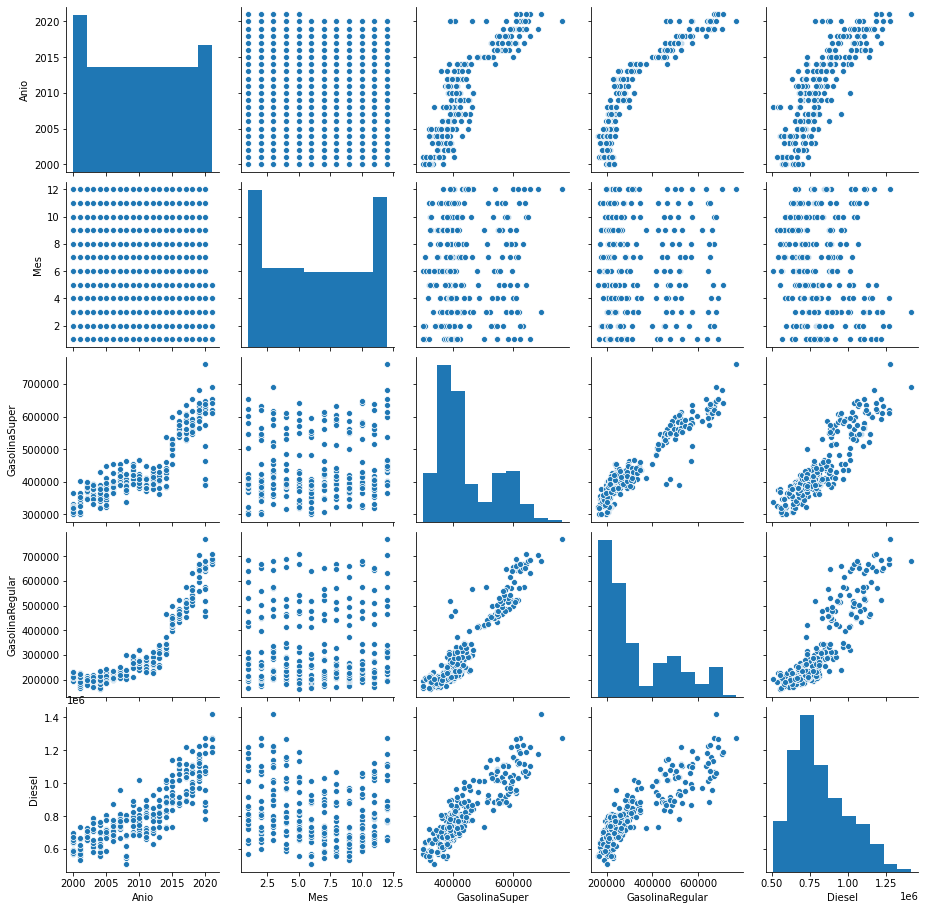

In [22]:
sns.pairplot(data_con)

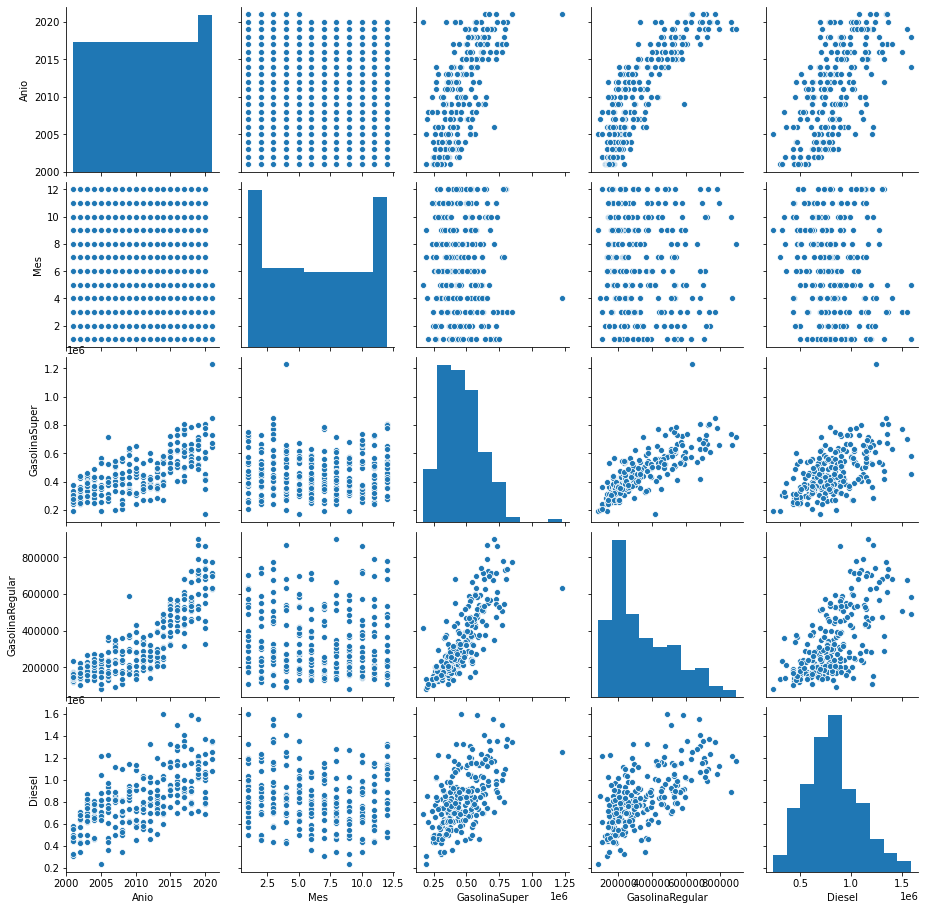

In [23]:
sns.pairplot(data_imp)

### Box Plot para Consumo

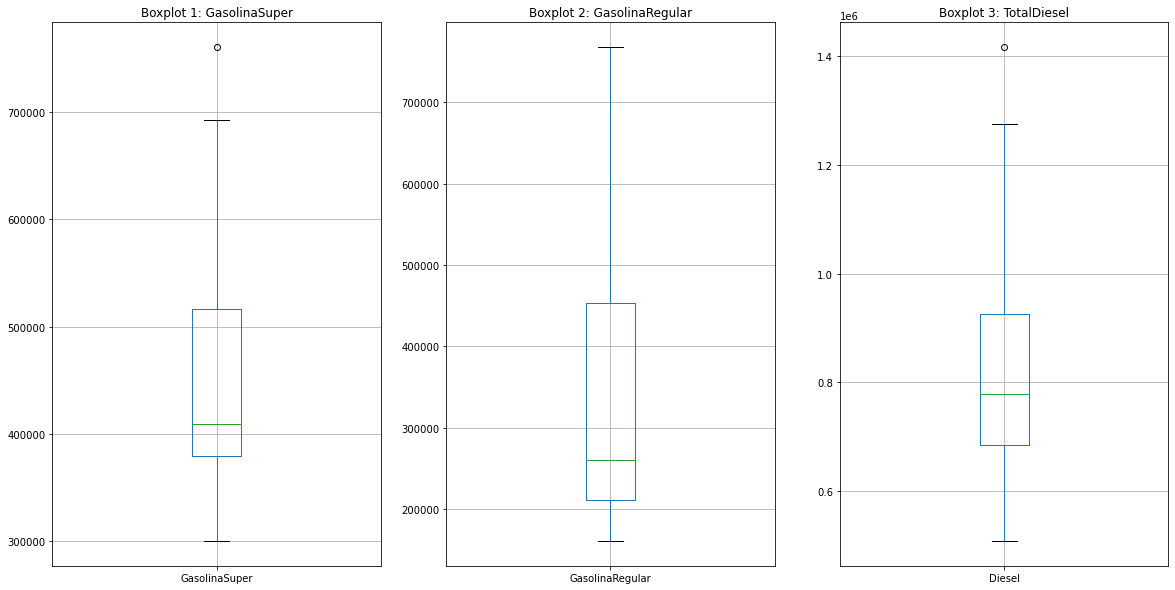

In [24]:
fig = plt.figure(figsize=(20,10)) 
ax = fig.add_subplot(131)
data_con.boxplot("GasolinaSuper")
ax.set_title("Boxplot 1: GasolinaSuper")
ax = fig.add_subplot(132)
data_con.boxplot("GasolinaRegular")
plt.title('Boxplot 2: GasolinaRegular')
ax = fig.add_subplot(133)
data_con.boxplot("Diesel")
ax.set_title("Boxplot 3: TotalDiesel")
plt.axis('tight')
plt.show()

### Box Plot para Importaciones

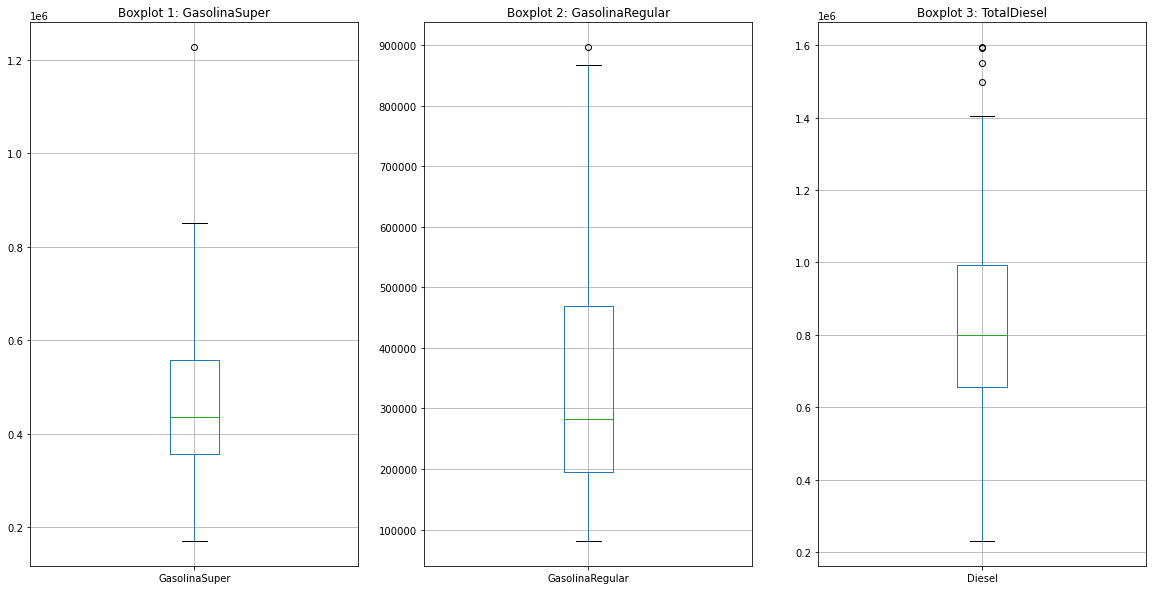

In [25]:
fig = plt.figure(figsize=(20,10)) 
ax = fig.add_subplot(131)
data_imp.boxplot("GasolinaSuper")
ax.set_title("Boxplot 1: GasolinaSuper")
ax = fig.add_subplot(132)
data_imp.boxplot("GasolinaRegular")
plt.title('Boxplot 2: GasolinaRegular')
ax = fig.add_subplot(133)
data_imp.boxplot("Diesel")
ax.set_title("Boxplot 3: TotalDiesel")
plt.axis('tight')
plt.show()

### Histogramas para Consumo

In [26]:
columnas = ["GasolinaSuper", "GasolinaRegular", "Diesel"]

<Figure size 1440x720 with 0 Axes>

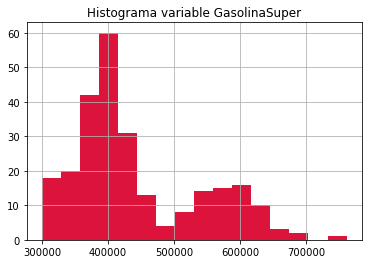

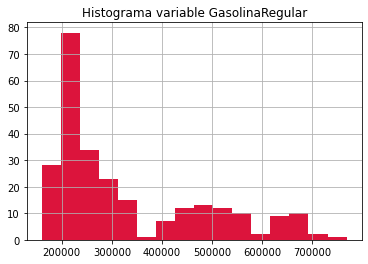

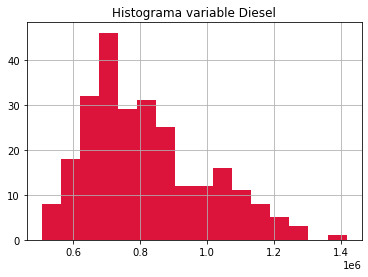

In [27]:
fig1 = plt.figure(figsize=(20,10)) 
for k in columnas:
    data_con.hist(k, bins = 16, color = "crimson")
    plt.title("Histograma variable " + str(k))

### Histogramas para Importaciones

<Figure size 1440x720 with 0 Axes>

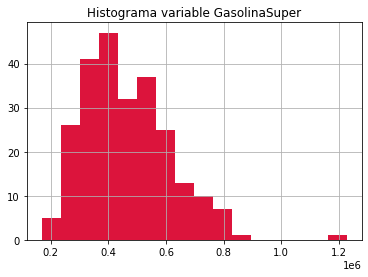

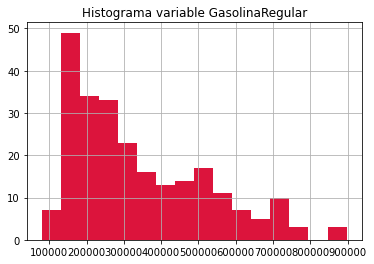

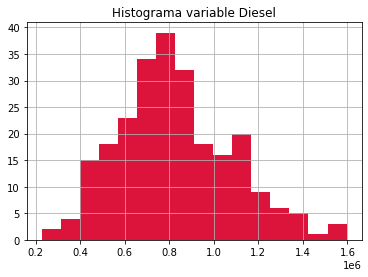

In [28]:
fig1 = plt.figure(figsize=(20,10)) 
for k in columnas:
    data_imp.hist(k, bins = 16, color = "crimson")
    plt.title("Histograma variable " + str(k))

### Comparación Mensual para cada tipo de Gasolina de consumo

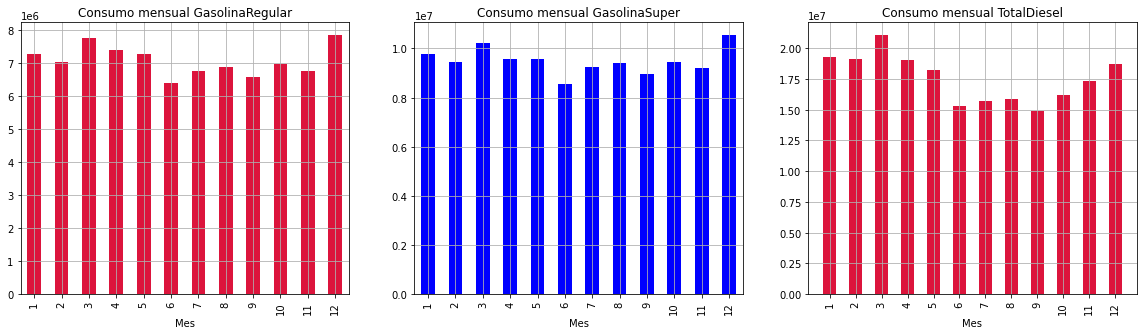

In [29]:
fig = plt.figure(figsize=(20,5)) 
ax = fig.add_subplot(131)
data_con.groupby('Mes').GasolinaRegular.sum().plot.bar(color = "crimson")
ax.set_title("Consumo mensual GasolinaRegular")
plt.grid()
ax = fig.add_subplot(132)
data_con.groupby('Mes').GasolinaSuper.sum().plot.bar(color = "blue")
ax.set_title("Consumo mensual GasolinaSuper")
plt.grid()
ax = fig.add_subplot(133)
data_con.groupby('Mes').Diesel.sum().plot.bar(color = "crimson")
ax.set_title("Consumo mensual TotalDiesel")
plt.grid()
plt.axis('tight')
plt.show()

### Comparación Mensual para cada tipo de Gasolina de importación

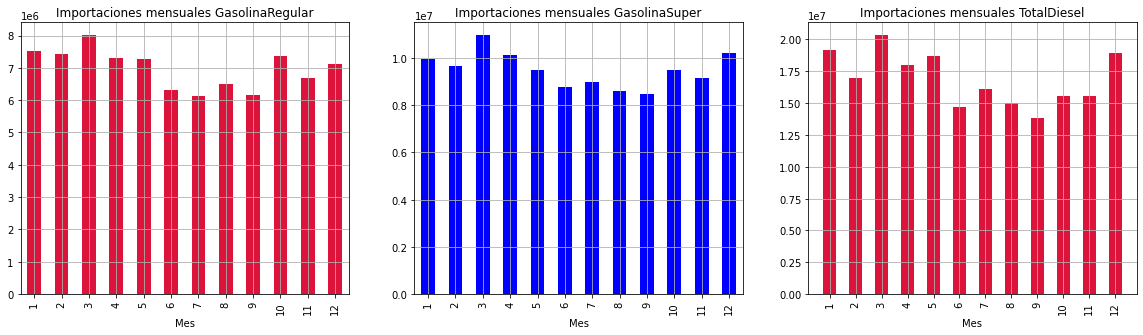

In [30]:
fig = plt.figure(figsize=(20,5)) 
ax = fig.add_subplot(131)
data_imp.groupby('Mes').GasolinaRegular.sum().plot.bar(color = "crimson")
ax.set_title("Importaciones mensuales GasolinaRegular")
plt.grid()
ax = fig.add_subplot(132)
data_imp.groupby('Mes').GasolinaSuper.sum().plot.bar(color = "blue")
ax.set_title("Importaciones mensuales GasolinaSuper")
plt.grid()
ax = fig.add_subplot(133)
data_imp.groupby('Mes').Diesel.sum().plot.bar(color = "crimson")
ax.set_title("Importaciones mensuales TotalDiesel")
plt.grid()
plt.axis('tight')
plt.show()

### Comparación Anual para cada tipo de Gasolina de consumo

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text major ticklabel objects>)

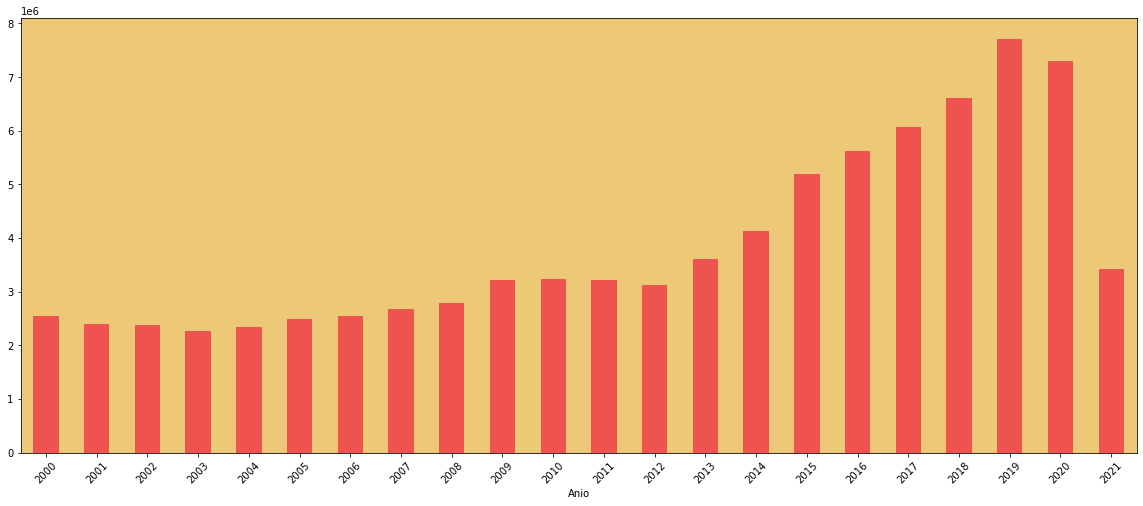

In [84]:
fig = plt.figure(figsize=(20,8))
data_con.groupby('Anio').GasolinaRegular.sum().plot.bar(color = "#ef534f")
plt.rcParams['axes.facecolor'] = '#edc876'
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text major ticklabel objects>)

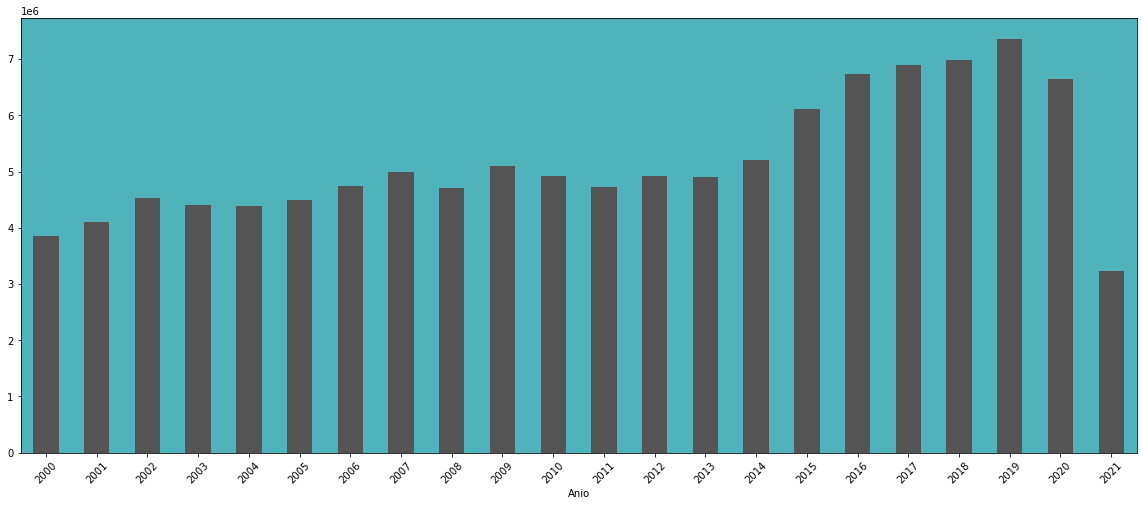

In [87]:
fig = plt.figure(figsize=(20,8))
data_con.groupby('Anio').GasolinaSuper.sum().plot.bar(color = "#545454")
plt.rcParams['axes.facecolor'] = '#50b2ba'
plt.xticks(rotation = 45)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21]),
 <a list of 22 Text major ticklabel objects>)

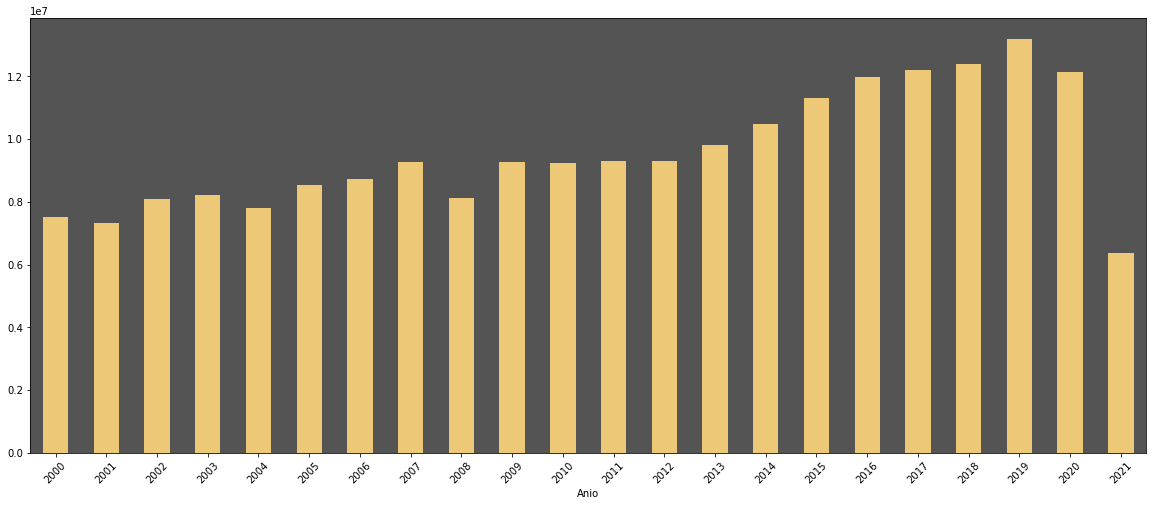

In [100]:
fig = plt.figure(figsize=(20,8))
data_con.groupby('Anio').Diesel.sum().plot.bar(color = "#edc876")
plt.rcParams['axes.facecolor'] = '#545454'
plt.xticks(rotation = 45)

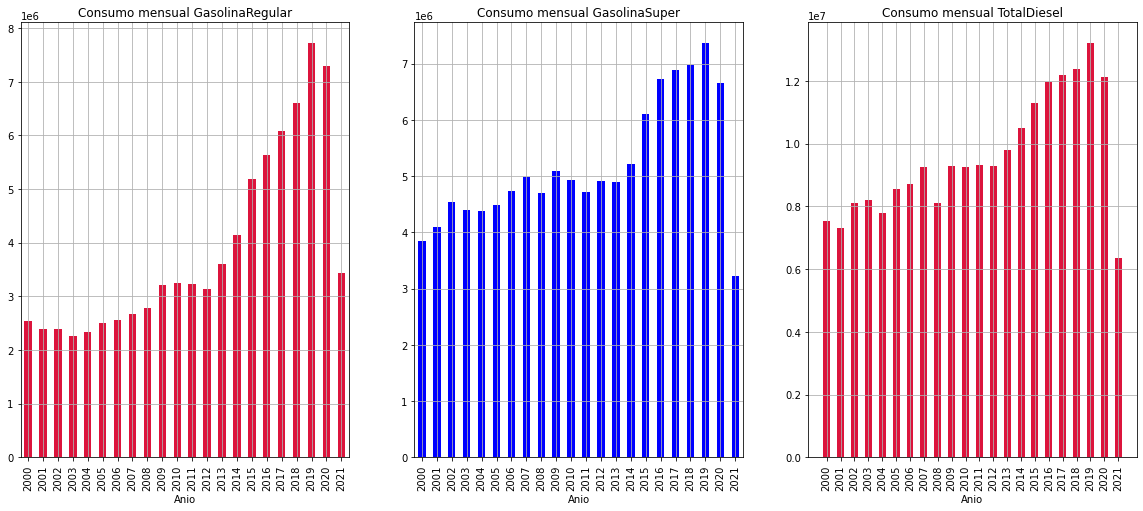

In [31]:
fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(131)
data_con.groupby('Anio').GasolinaRegular.sum().plot.bar(color = "crimson")
ax.set_title("Consumo mensual GasolinaRegular")
plt.grid()
ax = fig.add_subplot(132)
data_con.groupby('Anio').GasolinaSuper.sum().plot.bar(color = "blue")
ax.set_title("Consumo mensual GasolinaSuper")
plt.grid()
ax = fig.add_subplot(133)
data_con.groupby('Anio').Diesel.sum().plot.bar(color = "crimson")
ax.set_title("Consumo mensual TotalDiesel")
plt.grid()
plt.axis('tight')
plt.show()

### Comparación Anual para cada tipo de Gasolina de Importaciones

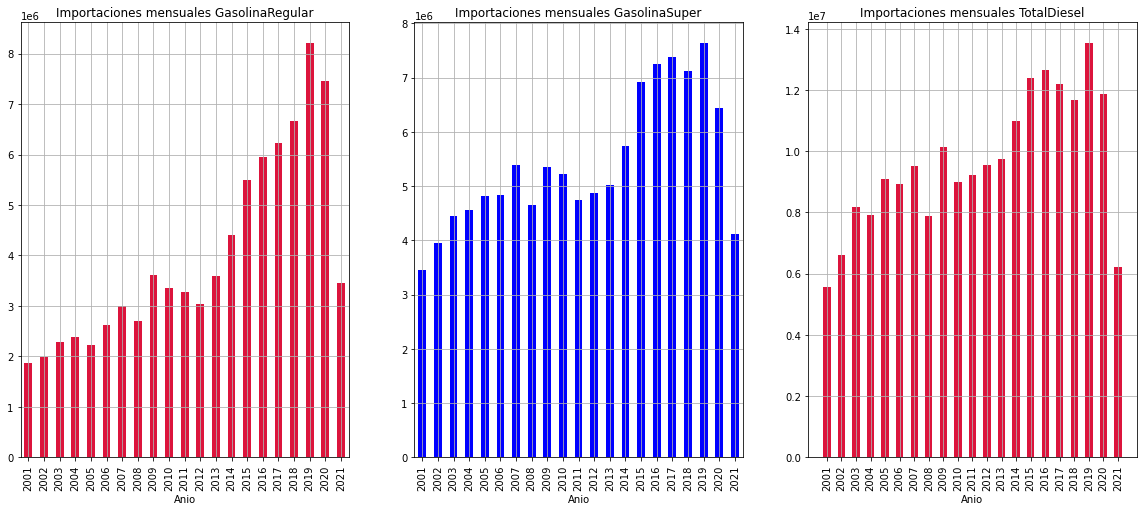

In [32]:
fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(131)
data_imp.groupby('Anio').GasolinaRegular.sum().plot.bar(color = "crimson")
ax.set_title("Importaciones mensuales GasolinaRegular")
plt.grid()
ax = fig.add_subplot(132)
data_imp.groupby('Anio').GasolinaSuper.sum().plot.bar(color = "blue")
ax.set_title("Importaciones mensuales GasolinaSuper")
plt.grid()
ax = fig.add_subplot(133)
data_imp.groupby('Anio').Diesel.sum().plot.bar(color = "crimson")
ax.set_title("Importaciones mensuales TotalDiesel")
plt.grid()
plt.axis('tight')
plt.show()

### Series de tiempo para Consumo

### Transformamos los datos a tipo fecha

In [33]:
formato_fecha(data_con)
formato_fecha(data_imp)

In [34]:
data_con.index = data_con["Fechas"]

In [35]:
data_imp.index = data_imp["Fechas"]

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

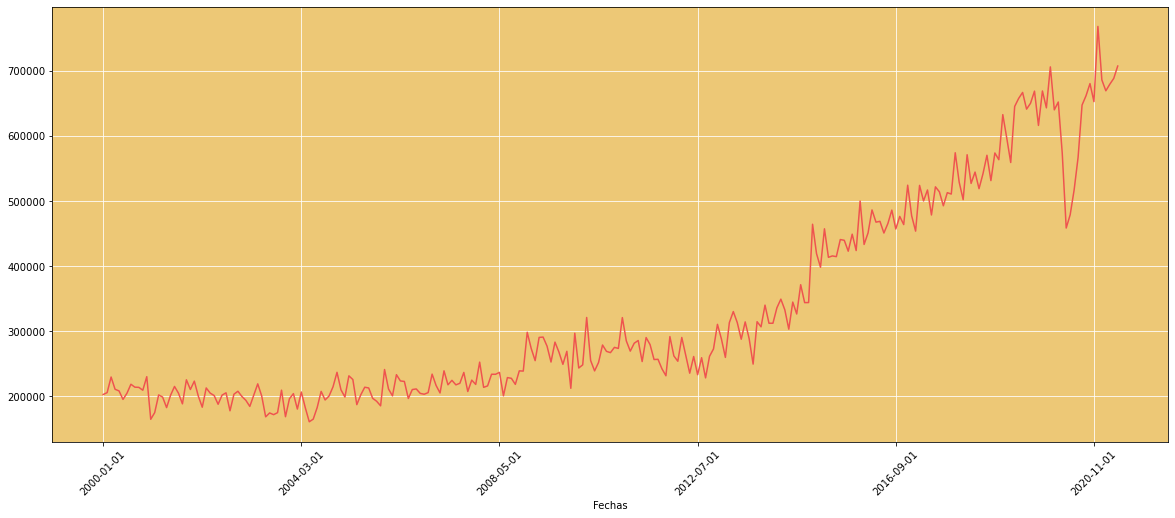

In [110]:
fig = plt.figure(figsize=(20,8))
data_con["GasolinaRegular"].plot(color = "#ef534f")
plt.rcParams['axes.facecolor'] = '#edc876'
plt.grid(color = "white")
plt.xticks(rotation=45)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

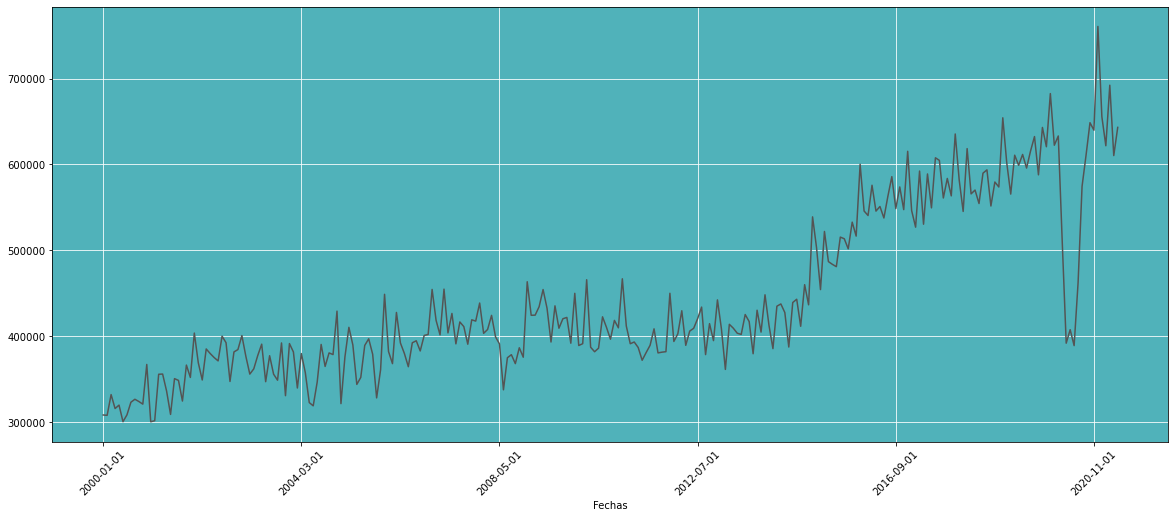

In [112]:
fig = plt.figure(figsize=(20,8))
data_con["GasolinaSuper"].plot(color = "#545454")
plt.rcParams['axes.facecolor'] = '#50b2ba'
plt.grid(color = "white")
plt.xticks(rotation=45)

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

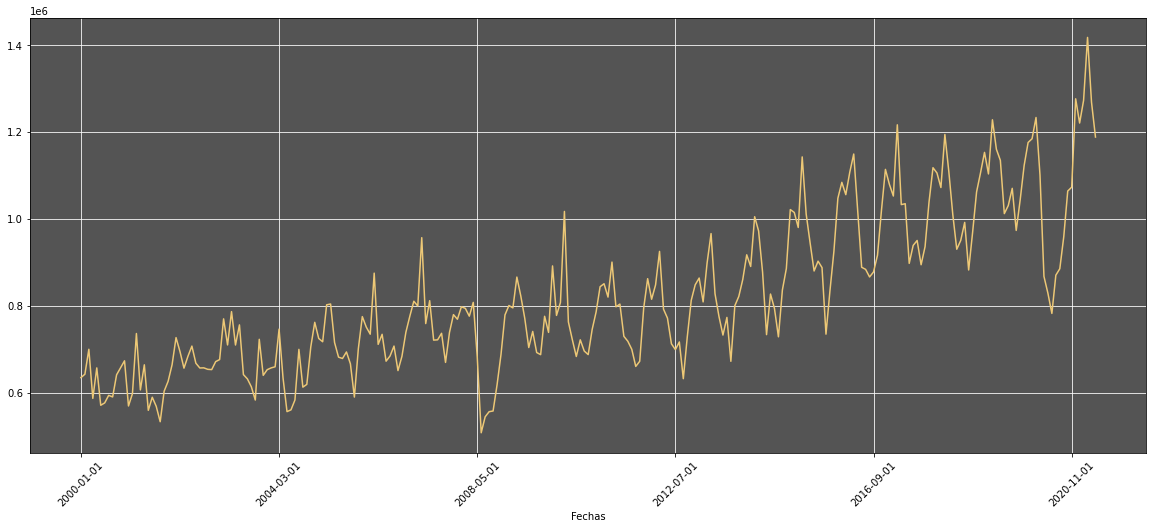

In [108]:
fig = plt.figure(figsize=(20,8))
data_con["Diesel"].plot(color = "#edc876")
plt.rcParams['axes.facecolor'] = '#545454'
plt.grid(color = "white")
plt.xticks(rotation=45)

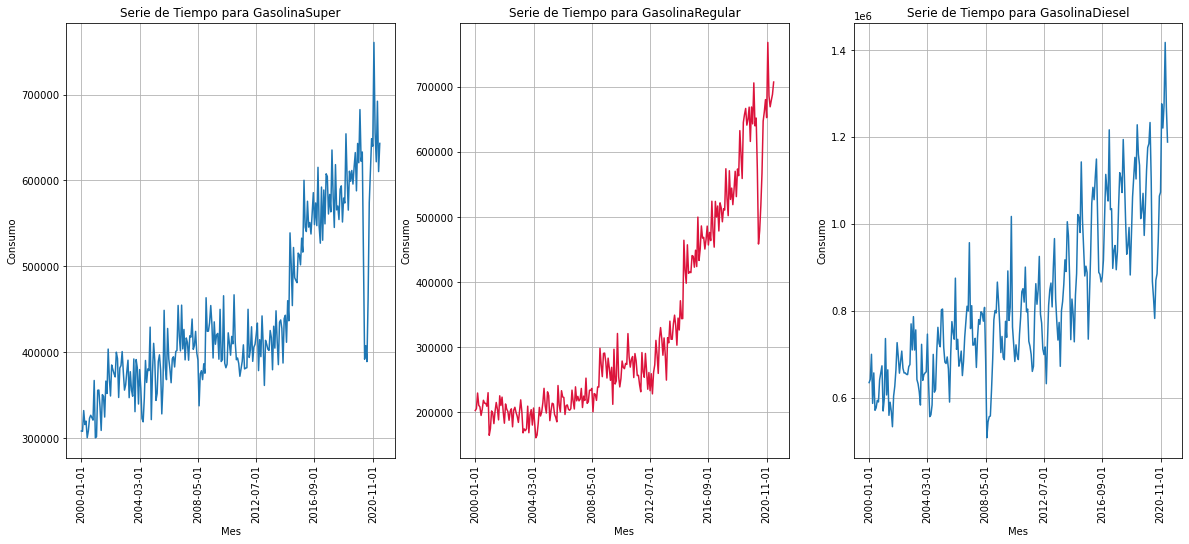

In [36]:
fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(131)
data_con["GasolinaSuper"].plot()
plt.grid()
plt.title("Serie de Tiempo para GasolinaSuper")
plt.ylabel("Consumo")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(132)
data_con["GasolinaRegular"].plot(color = "crimson")
plt.grid()
plt.title("Serie de Tiempo para GasolinaRegular")
plt.ylabel("Consumo")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(133)
data_con["Diesel"].plot()
plt.grid()
plt.title("Serie de Tiempo para GasolinaDiesel")
plt.ylabel("Consumo")
plt.xlabel("Mes")
plt.xticks(rotation=90)
plt.axis('tight')
plt.show()

### Series de tiempo para Importaciones

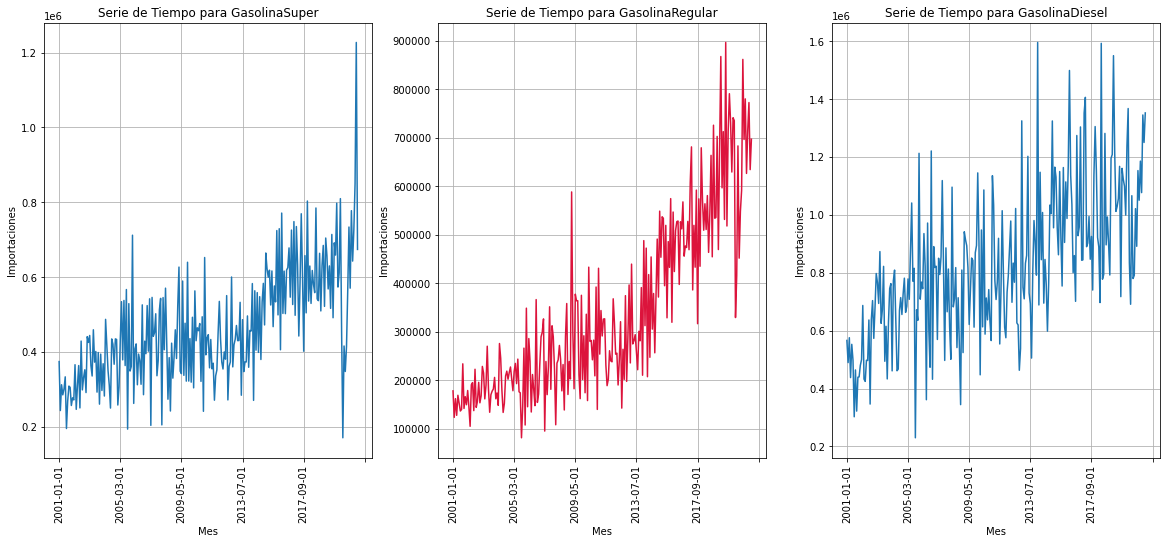

In [37]:
fig = plt.figure(figsize=(20,8)) 
ax = fig.add_subplot(131)
data_imp["GasolinaSuper"].plot()
plt.grid()
plt.title("Serie de Tiempo para GasolinaSuper")
plt.ylabel("Importaciones")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(132)
data_imp["GasolinaRegular"].plot(color = "crimson")
plt.grid()
plt.title("Serie de Tiempo para GasolinaRegular")
plt.ylabel("Importaciones")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(133)
data_imp["Diesel"].plot()
plt.grid()
plt.title("Serie de Tiempo para GasolinaDiesel")
plt.ylabel("Importaciones")
plt.xlabel("Mes")
plt.xticks(rotation=90)
plt.axis('tight')
plt.show()

### Segmentos la Data para los últimos 3 años

In [537]:
data_separar_con = data_con
data_separar_imp = data_imp

In [538]:
data_con = data_separar_con.iloc[:216, :]
data_con_test = data_separar_con.iloc[215:,:]

data_imp = data_separar_imp.iloc[:202, :]
data_imp_test = data_separar_imp.iloc[201:, :]

### Segmentamos la Data para 2021

In [581]:
data_2021_con = data_separar_con.iloc[252:, :]
data_2021_imp = data_separar_imp.iloc[240:, :]

In [582]:
data_2021_con

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,Fechas
Fechas,,,,,,
2021-01-01,2021,1,655503.47,685942.85,1220513.47,2021-01-01
2021-02-01,2021,2,621730.81,669313.36,1272593.63,2021-02-01
2021-03-01,2021,3,692228.61,679366.06,1417534.72,2021-03-01
2021-04-01,2021,4,610290.32,688389.15,1268514.31,2021-04-01
2021-05-01,2021,5,643104.75,707336.50,1188244.26,2021-05-01


In [583]:
data_2021_imp

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,Fechas
Fechas,,,,,,
2021-01-01,2021,1,642652.37,626537.48,1185644.96,2021-01-01
2021-02-01,2021,2,726508.78,715261.34,1076824.67,2021-02-01
2021-03-01,2021,3,850334.64,772750.01,1345110.18,2021-03-01
2021-04-01,2021,4,1227173.53,634408.89,1250171.58,2021-04-01
2021-05-01,2021,5,673824.38,697161.30,1352156.27,2021-05-01


In [539]:
data_con

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,Fechas
Fechas,,,,,,
2000-01-01,2000,1,308156.82,202645.20,634667.06,2000-01-01
2000-02-01,2000,2,307766.31,205530.96,642380.66,2000-02-01
2000-03-01,2000,3,331910.29,229499.56,699807.25,2000-03-01
2000-04-01,2000,4,315648.08,210680.40,586803.98,2000-04-01
2000-05-01,2000,5,319667.97,208164.34,656948.20,2000-05-01
...,...,...,...,...,...,...
2017-08-01,2017,8,604650.34,514086.57,950188.14,2017-08-01
2017-09-01,2017,9,560892.67,492618.55,894363.58,2017-09-01
2017-10-01,2017,10,583658.83,512762.32,935986.17,2017-10-01


In [540]:
data_con_test

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,Fechas
Fechas,,,,,,
2017-12-01,2017,12,635423.76,574097.70,1117711.45,2017-12-01
2018-01-01,2018,1,581802.98,528763.30,1105628.89,2018-01-01
2018-02-01,2018,2,545210.00,502041.67,1072071.67,2018-02-01
2018-03-01,2018,3,618402.18,571052.13,1194136.18,2018-03-01
2018-04-01,2018,4,565665.72,526979.67,1108452.97,2018-04-01
2018-05-01,2018,5,570129.66,544395.17,1009750.15,2018-05-01
2018-06-01,2018,6,554431.50,518911.44,930065.00,2018-06-01
2018-07-01,2018,7,589775.97,541811.12,950343.54,2018-07-01
2018-08-01,2018,8,593659.63,570224.11,991818.15,2018-08-01


In [541]:
data_imp

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,Fechas
Fechas,,,,,,
2001-01-01,2001,1,373963.96,177776.50,566101.99,2001-01-01
2001-02-01,2001,2,243091.07,123115.99,489525.80,2001-02-01
2001-03-01,2001,3,312084.38,161726.42,575559.68,2001-03-01
2001-04-01,2001,4,285054.89,127338.74,437745.42,2001-04-01
2001-05-01,2001,5,300913.67,168730.19,552609.13,2001-05-01
...,...,...,...,...,...,...
2017-06-01,2017,6,582374.34,519389.66,902659.00,2017-06-01
2017-07-01,2017,7,769214.06,433026.08,994338.30,2017-07-01
2017-08-01,2017,8,607368.72,592103.31,846696.35,2017-08-01


In [542]:
data_imp_test

,Anio,Mes,GasolinaSuper,GasolinaRegular,Diesel,Fechas
Fechas,,,,,,
2017-10-01,2017,10,657241.76,574073.61,740198.57,2017-10-01
2017-11-01,2017,11,504247.31,434963.36,1135350.10,2017-11-01
2017-12-01,2017,12,803216.88,679441.47,1305047.55,2017-12-01
2018-01-01,2018,1,535784.70,571858.06,1153831.89,2018-01-01
2018-02-01,2018,2,629467.91,509366.10,921684.12,2018-02-01
2018-03-01,2018,3,529507.15,563899.06,889227.10,2018-03-01
2018-04-01,2018,4,617512.28,510830.00,696962.77,2018-04-01
2018-05-01,2018,5,580329.35,580825.11,1592580.34,2018-05-01
2018-06-01,2018,6,558257.59,463620.61,777679.91,2018-06-01


## Descomposición para las series de tiempo

### Consumo: Gasolina Regular

In [543]:
resultRegular =seasonal_decompose(data_con['GasolinaRegular'], period = 21)

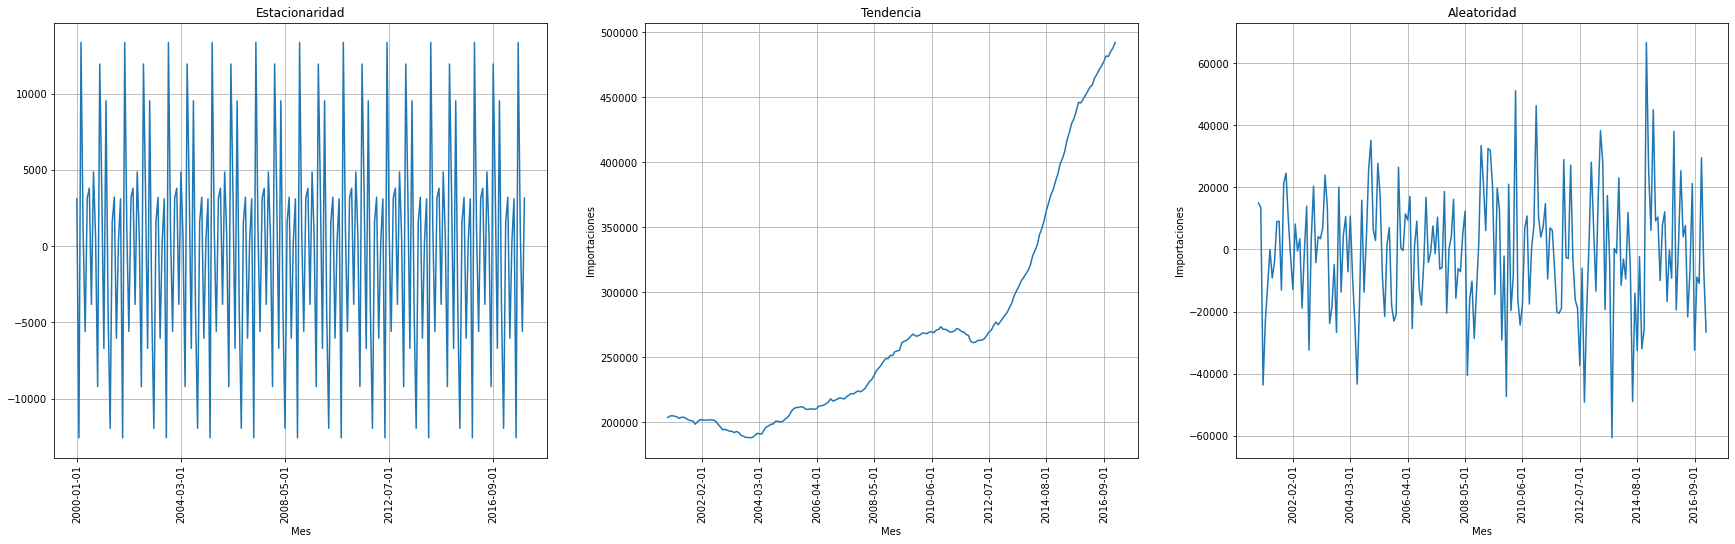

In [544]:
fig = plt.figure(figsize=(30,8)) 
ax = fig.add_subplot(131)
resultRegular.seasonal.plot()
plt.grid()
plt.title("Estacionaridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(132)
resultRegular.trend.plot()
plt.grid()
plt.title("Tendencia")
plt.ylabel("Importaciones")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(133)
resultRegular.resid.plot()
plt.grid()
plt.title("Aleatoridad")
plt.ylabel("Importaciones")
plt.xlabel("Mes")
plt.xticks(rotation=90)
plt.axis('tight')
plt.show()

### Consumo: Gasolina Super

In [545]:
resultSuper =seasonal_decompose(data_con['GasolinaSuper'], period = 21)

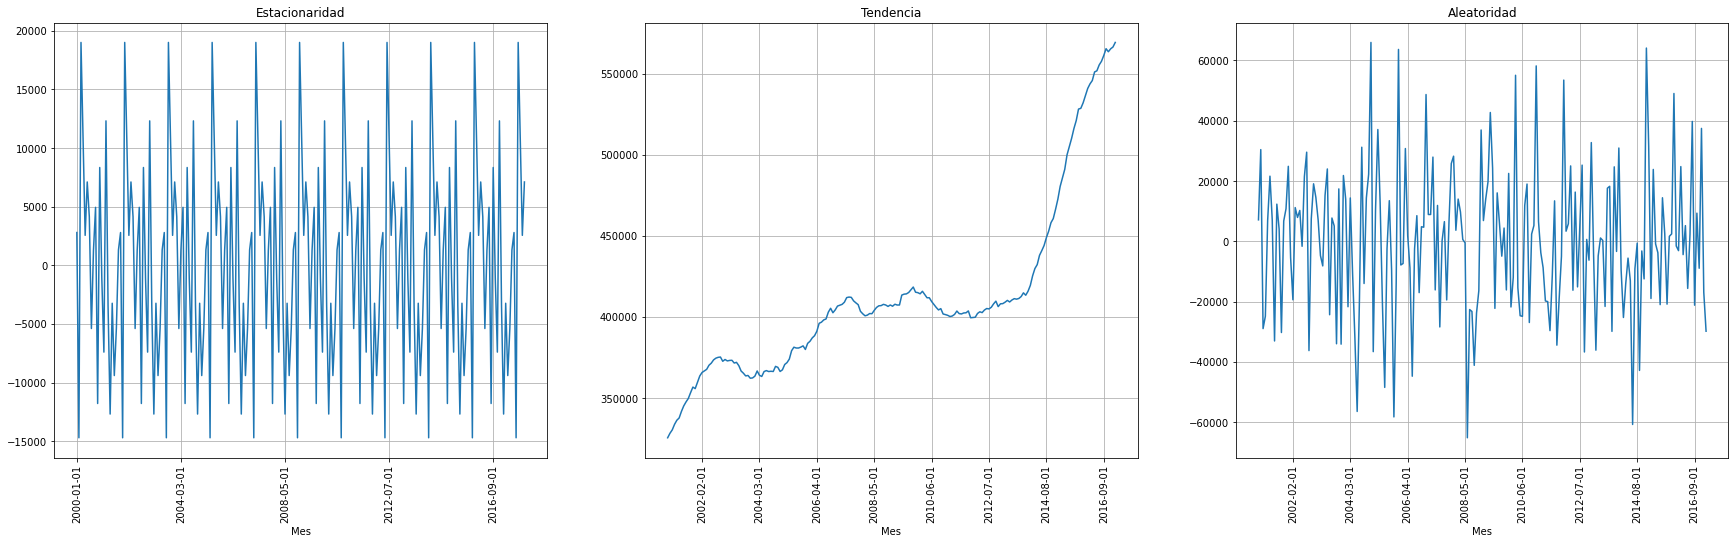

In [546]:
fig = plt.figure(figsize=(30,8)) 
ax = fig.add_subplot(131)
resultSuper.seasonal.plot()
plt.grid()
plt.title("Estacionaridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(132)
resultSuper.trend.plot()
plt.grid()
plt.title("Tendencia")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(133)
resultSuper.resid.plot()
plt.grid()
plt.title("Aleatoridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
plt.axis('tight')
plt.show()

### Consumo: Gasolina Diesel

In [547]:
resultDiesel =seasonal_decompose(data_con['Diesel'], period = 21)

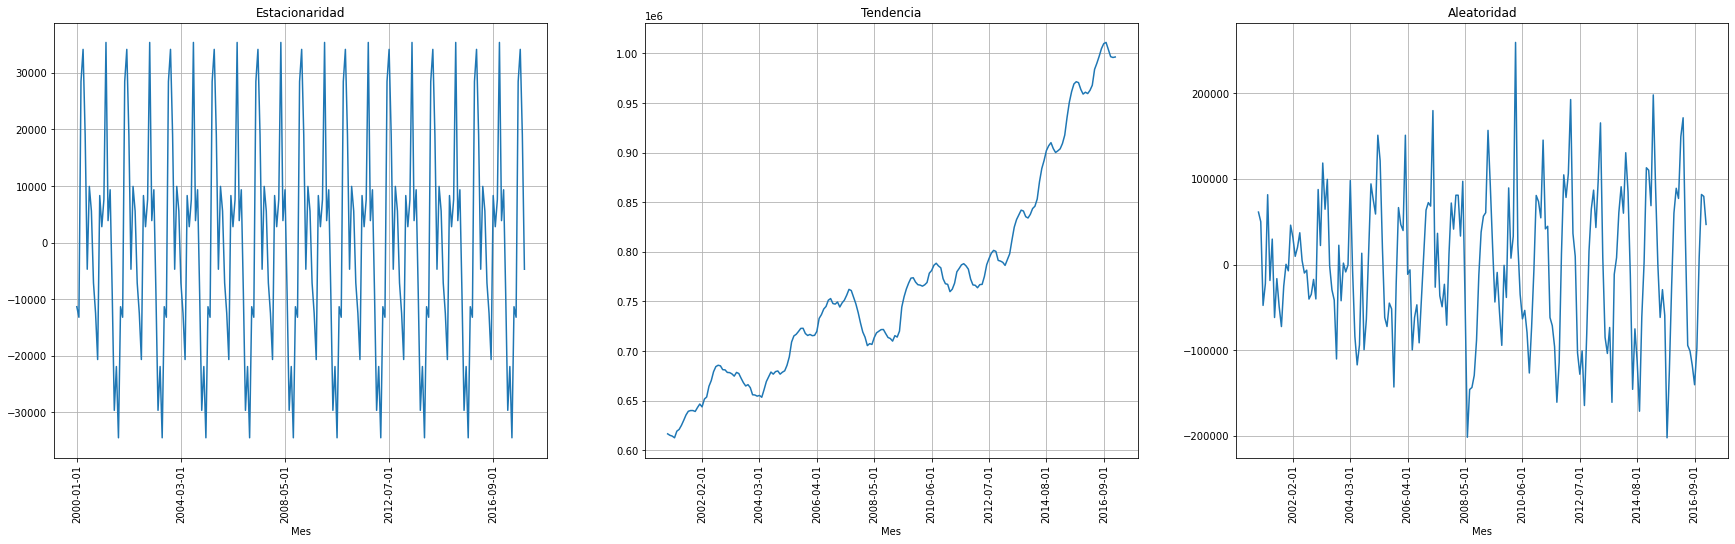

In [548]:
fig = plt.figure(figsize=(30,8)) 
ax = fig.add_subplot(131)
resultDiesel.seasonal.plot()
plt.grid()
plt.title("Estacionaridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(132)
resultDiesel.trend.plot()
plt.grid()
plt.title("Tendencia")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(133)
resultDiesel.resid.plot()
plt.grid()
plt.title("Aleatoridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
plt.axis('tight')
plt.show()

### Importaciones: Gasolina Regular

In [549]:
resultRegular =seasonal_decompose(data_imp['GasolinaRegular'], period = 21)

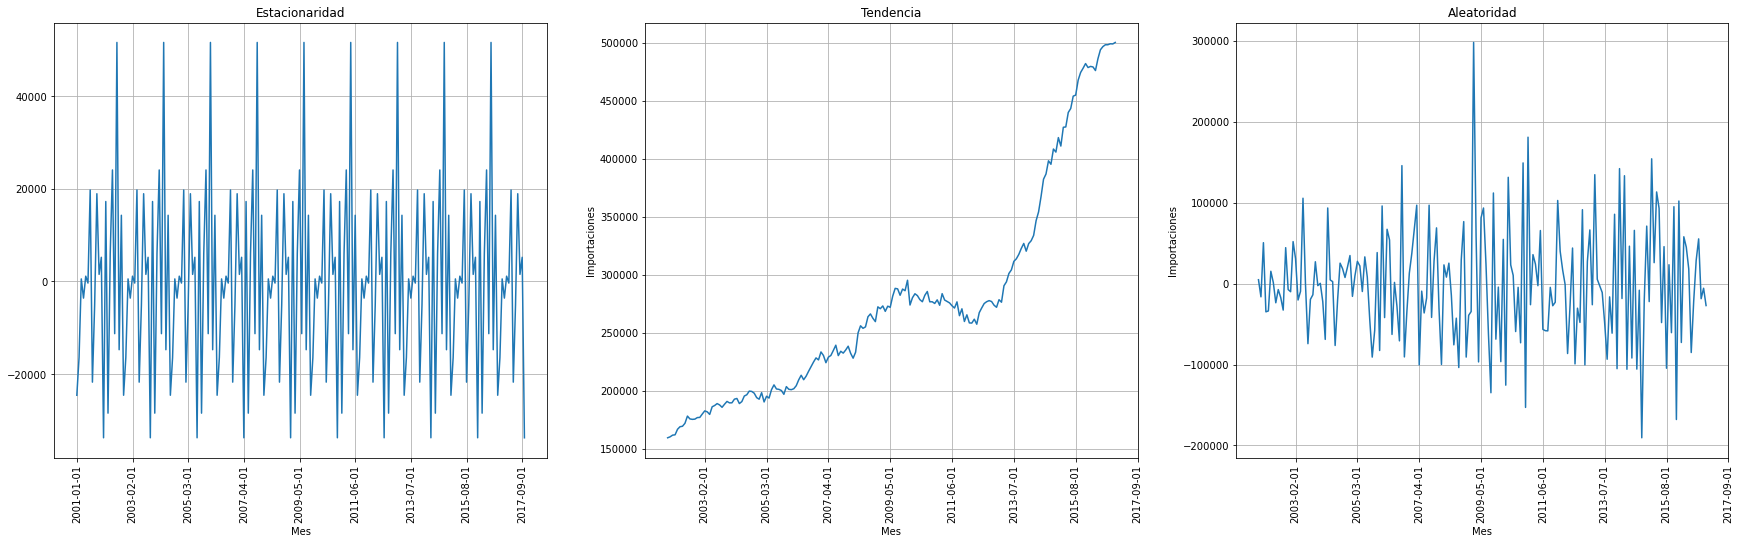

In [550]:
fig = plt.figure(figsize=(30,8)) 
ax = fig.add_subplot(131)
resultRegular.seasonal.plot()
plt.grid()
plt.title("Estacionaridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(132)
resultRegular.trend.plot()
plt.grid()
plt.title("Tendencia")
plt.ylabel("Importaciones")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(133)
resultRegular.resid.plot()
plt.grid()
plt.title("Aleatoridad")
plt.ylabel("Importaciones")
plt.xlabel("Mes")
plt.xticks(rotation=90)
plt.axis('tight')
plt.show()

### Importaciones: Gasolina Super

In [551]:
resultSuper =seasonal_decompose(data_imp['GasolinaSuper'], period = 21)

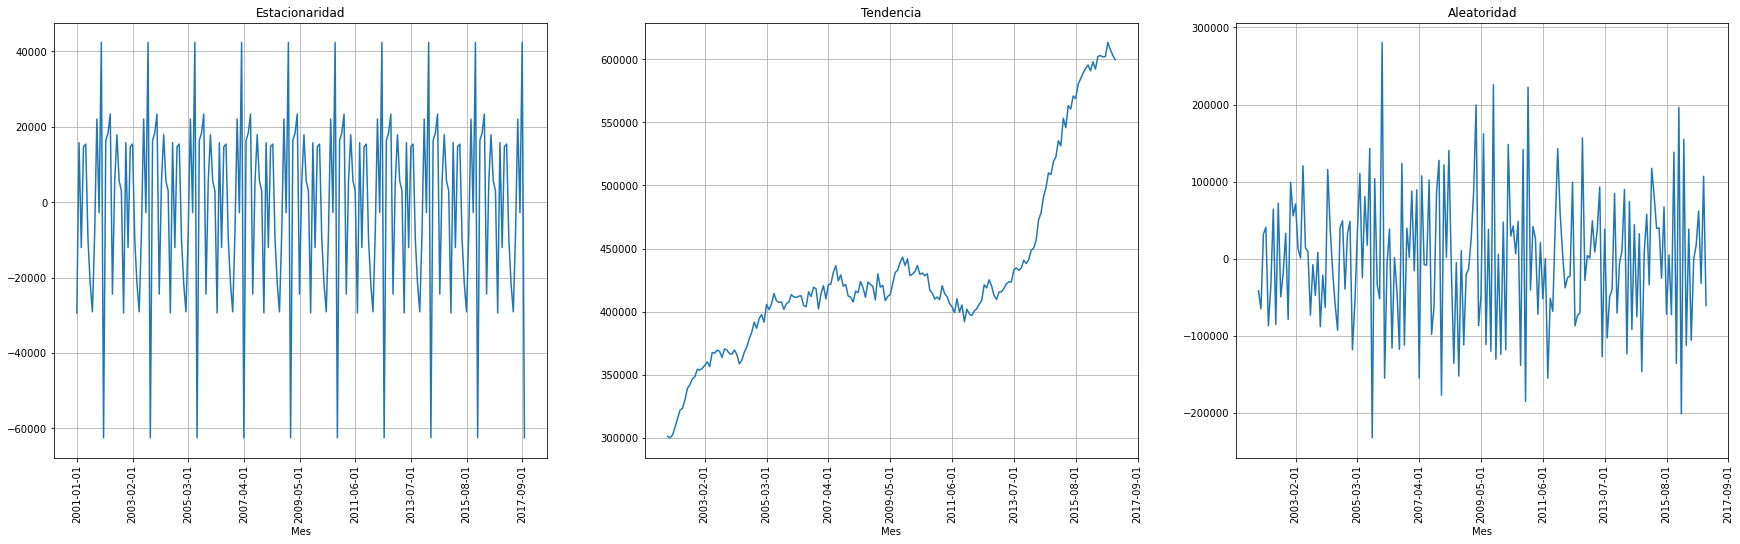

In [552]:
fig = plt.figure(figsize=(30,8)) 
ax = fig.add_subplot(131)
resultSuper.seasonal.plot()
plt.grid()
plt.title("Estacionaridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(132)
resultSuper.trend.plot()
plt.grid()
plt.title("Tendencia")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(133)
resultSuper.resid.plot()
plt.grid()
plt.title("Aleatoridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
plt.axis('tight')
plt.show()

### Importaciones: Gasolina Diesel

In [553]:
resultDiesel =seasonal_decompose(data_imp['Diesel'], period = 21)

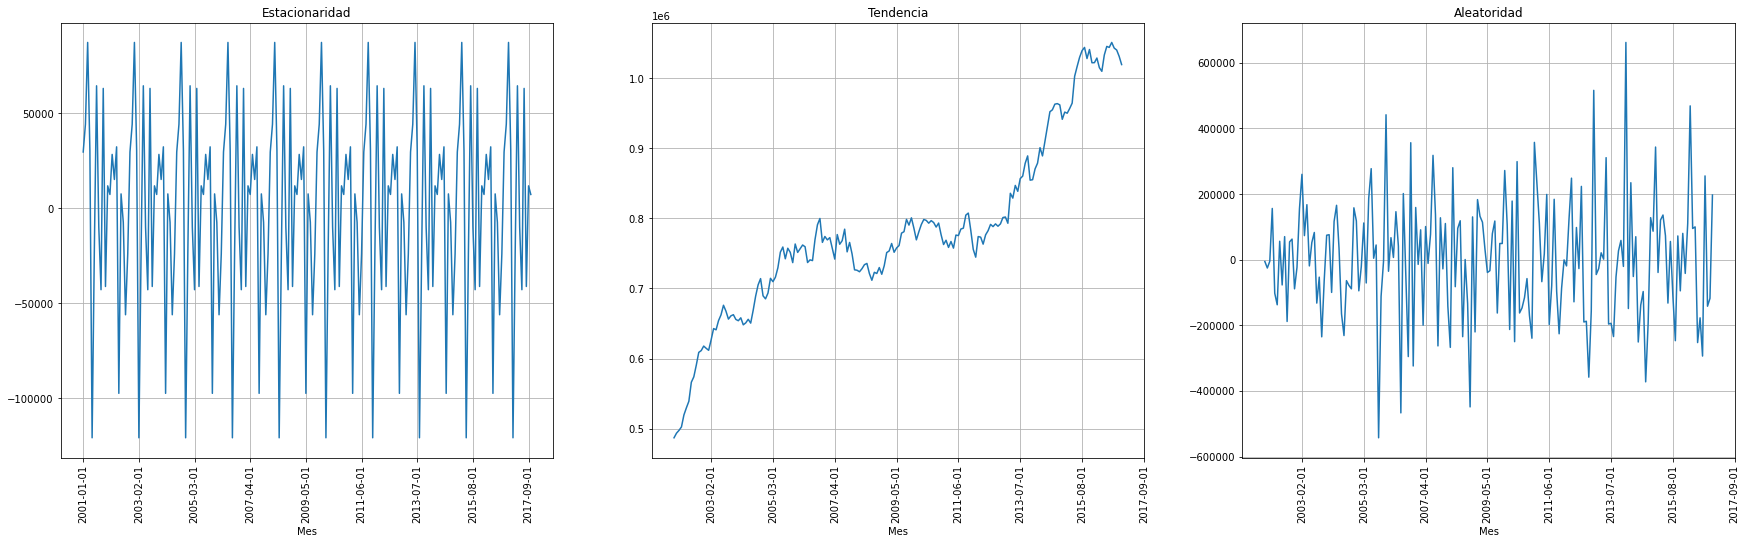

In [554]:
fig = plt.figure(figsize=(30,8)) 
ax = fig.add_subplot(131)
resultDiesel.seasonal.plot()
plt.grid()
plt.title("Estacionaridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(132)
resultDiesel.trend.plot()
plt.grid()
plt.title("Tendencia")
plt.xlabel("Mes")
plt.xticks(rotation=90)
ax = fig.add_subplot(133)
resultDiesel.resid.plot()
plt.grid()
plt.title("Aleatoridad")
plt.xlabel("Mes")
plt.xticks(rotation=90)
plt.axis('tight')
plt.show()

## Gráficos de Autocorrelación

### Para consumo

Text(0.5, 0, 'Lag')

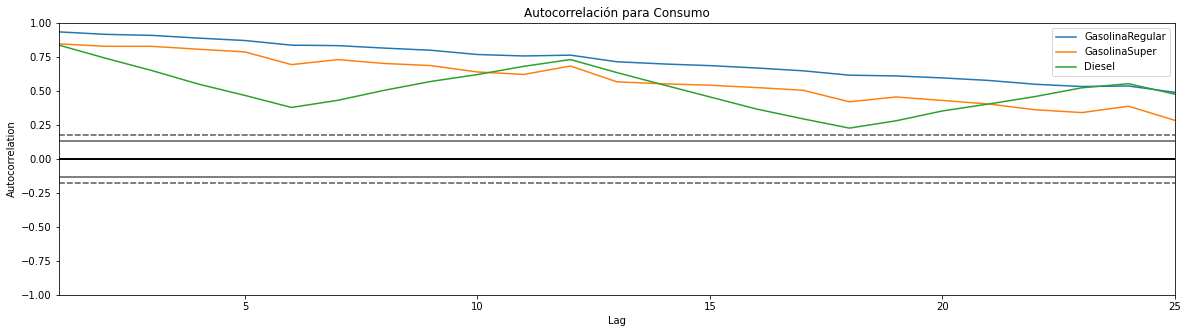

In [555]:
fig = plt.figure(figsize=(20,5)) 

pd.plotting.autocorrelation_plot(data_con["GasolinaRegular"], label = "GasolinaRegular").set_xlim([1, 25])
pd.plotting.autocorrelation_plot(data_con["GasolinaSuper"], label = "GasolinaSuper").set_xlim([1, 25])
pd.plotting.autocorrelation_plot(data_con["Diesel"], label = "Diesel").set_xlim([1, 25])
plt.grid()
plt.title("Autocorrelación para Consumo")
plt.xlabel("Lag")

### Para importaciones

Text(0.5, 0, 'Lag')

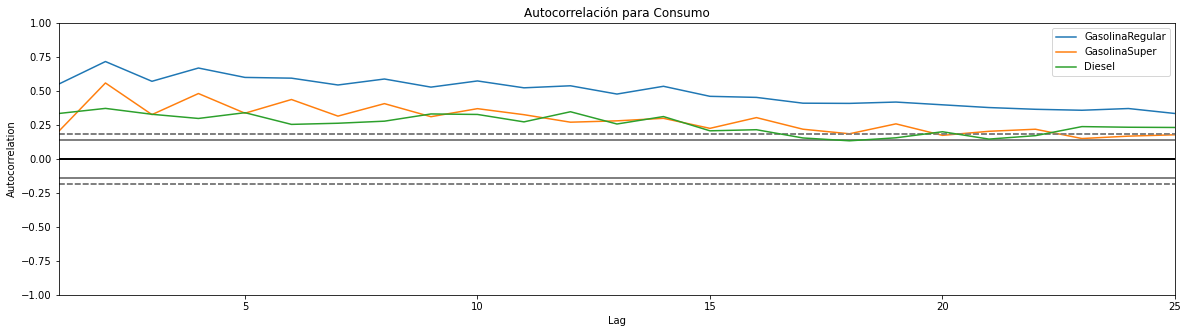

In [556]:
fig = plt.figure(figsize=(20,5)) 

pd.plotting.autocorrelation_plot(data_imp["GasolinaRegular"], label = "GasolinaRegular").set_xlim([1, 25])
pd.plotting.autocorrelation_plot(data_imp["GasolinaSuper"], label = "GasolinaSuper").set_xlim([1, 25])
pd.plotting.autocorrelation_plot(data_imp["Diesel"], label = "Diesel").set_xlim([1, 25])
plt.grid()
plt.title("Autocorrelación para Consumo")
plt.xlabel("Lag")

## Pruebas de Dickey - Fuller

En las pruebas estadísticas suponemos lo siguiente: 

- $H_{0}: $ tiene una raíz unitaria. No es estacionaria en $\mu$ y tiene dependencia del tiempo.
- $H_{1}: $ no tiene una raíz unitaria. Es estacionaria en $\mu$ y no tiene un dependecia del tiempo. 

Con el siguiente criterio: 

- Si el valor - $p > 0.05$ no se rechaza la hipótesis nula.
- Si el valor - $p \leq 0.05$ se rechaza la hipótesis nula.

### Consumo: Gasolina Regular

In [557]:
Xregularcon = data_con["GasolinaRegular"].values

ResultRegularcon = adfuller(Xregularcon)

print('Estadístico: %f' % ResultRegularcon[0])
print('Valor - p: %f' % ResultRegularcon[1])
print('Valores críticos:')
for key, value in ResultRegularcon[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: 2.218671
Valor - p: 0.998898
Valores críticos:
	1%: -3.463
	5%: -2.876
	10%: -2.574


### Consumo: Gasolina Super

In [558]:
Xsupercon = data_con["GasolinaSuper"].values

ResultSupercon = adfuller(Xsupercon)

print('Estadístico: %f' % ResultSupercon[0])
print('Valor - p: %f' % ResultSupercon[1])
print('Valores críticos:')
for key, value in ResultSupercon[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: 0.462689
Valor - p: 0.983694
Valores críticos:
	1%: -3.463
	5%: -2.876
	10%: -2.574


### Consumo: Gasolina Diesel

In [559]:
Xdieselcon = data_con["Diesel"].values

ResultDieselcon = adfuller(Xdieselcon)

print('Estadístico: %f' % ResultDieselcon[0])
print('Valor - p: %f' % ResultDieselcon[1])
print('Valores críticos:')
for key, value in ResultDieselcon[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: 0.135228
Valor - p: 0.968386
Valores críticos:
	1%: -3.463
	5%: -2.876
	10%: -2.574


### Importaciones: Gasolina Regular

In [560]:
Xregularimp = data_imp["GasolinaRegular"].values

ResultRegularimp = adfuller(Xregularimp)

print('Estadístico: %f' % ResultRegularimp[0])
print('Valor - p: %f' % ResultRegularimp[1])
print('Valores críticos:')
for key, value in ResultRegularimp[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: 0.696200
Valor - p: 0.989762
Valores críticos:
	1%: -3.466
	5%: -2.877
	10%: -2.575


### Importaciones: Gasolina Super

In [561]:
Xsuperimp = data_imp["GasolinaSuper"].values

ResultSuperimp = adfuller(Xsuperimp)

print('Estadístico: %f' % ResultSuperimp[0])
print('Valor - p: %f' % ResultSuperimp[1])
print('Valores críticos:')
for key, value in ResultSuperimp[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: -1.709222
Valor - p: 0.426368
Valores críticos:
	1%: -3.464
	5%: -2.876
	10%: -2.575


### Importaciones: Gasolina Diesel

In [562]:
Xdieselimp = data_imp["Diesel"].values

ResultDieselimp = adfuller(Xdieselimp)

print('Estadístico: %f' % ResultDieselimp[0])
print('Valor - p: %f' % ResultDieselimp[1])
print('Valores críticos:')
for key, value in ResultDieselimp[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: -1.676655
Valor - p: 0.443179
Valores críticos:
	1%: -3.466
	5%: -2.877
	10%: -2.575


### Aplicamos una Diferencia para ver que ocurre


# Primera diferencia

### Consumo: Gasolina Regular

In [563]:
data_con["GasolinaRegular"] = np.log(data_con["GasolinaRegular"])
diffregularcon = data_con["GasolinaRegular"].diff().dropna()

ResultRegularcon = adfuller(diffregularcon)

print('Estadístico: %f' % ResultRegularcon[0])
print('Valor - p: %f' % ResultRegularcon[1])
print('Valores críticos:')
for key, value in ResultRegularcon[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: -5.006193
Valor - p: 0.000022
Valores críticos:
	1%: -3.463
	5%: -2.876
	10%: -2.574


<ipython-input-563-b5f08a09eae6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_con["GasolinaRegular"] = np.log(data_con["GasolinaRegular"])


### Consumo: Gasolina Super

In [564]:
data_con["GasolinaSuper"] = np.log(data_con["GasolinaSuper"])
diffsupercon = data_con["GasolinaSuper"].diff().dropna()

ResultSupercon = adfuller(diffsupercon)

print('Estadístico: %f' % ResultSupercon[0])
print('Valor - p: %f' % ResultSupercon[1])
print('Valores críticos:')
for key, value in ResultSupercon[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: -4.846303
Valor - p: 0.000044
Valores críticos:
	1%: -3.463
	5%: -2.876
	10%: -2.574


<ipython-input-564-fa3a1124507d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_con["GasolinaSuper"] = np.log(data_con["GasolinaSuper"])


### Consumo: Gasolina Diesel

In [565]:
data_con["Diesel"] = np.log(data_con["Diesel"])
diffdieselcon = data_con["Diesel"].diff().dropna()

ResultDieselcon = adfuller(diffdieselcon)

print('Estadístico: %f' % ResultDieselcon[0])
print('Valor - p: %f' % ResultDieselcon[1])
print('Valores críticos:')
for key, value in ResultDieselcon[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: -6.147601
Valor - p: 0.000000
Valores críticos:
	1%: -3.463
	5%: -2.876
	10%: -2.574


<ipython-input-565-066835001cde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_con["Diesel"] = np.log(data_con["Diesel"])


### Importaciones: Gasolina Regular

In [566]:
data_imp["GasolinaRegular"] = np.log(data_imp["GasolinaRegular"])
diffregularimp = data_imp["GasolinaRegular"].diff().dropna()

ResultRegularimp = adfuller(diffregularimp)

print('Estadístico: %f' % ResultRegularimp[0])
print('Valor - p: %f' % ResultRegularimp[1])
print('Valores críticos:')
for key, value in ResultRegularimp[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: -6.679157
Valor - p: 0.000000
Valores críticos:
	1%: -3.466
	5%: -2.877
	10%: -2.575


<ipython-input-566-fa600896a96c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_imp["GasolinaRegular"] = np.log(data_imp["GasolinaRegular"])


### Importaciones: Gasolina Super

In [567]:
data_imp["GasolinaSuper"] = np.log(data_imp["GasolinaSuper"])
diffsuperimp = data_imp["GasolinaSuper"].diff().dropna()

ResultSuperimp = adfuller(diffsuperimp)

print('Estadístico: %f' % ResultSuperimp[0])
print('Valor - p: %f' % ResultSuperimp[1])
print('Valores críticos:')
for key, value in ResultSuperimp[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: -7.653597
Valor - p: 0.000000
Valores críticos:
	1%: -3.465
	5%: -2.877
	10%: -2.575


<ipython-input-567-9e34eeb7cdeb>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_imp["GasolinaSuper"] = np.log(data_imp["GasolinaSuper"])


### Importaciones: Gasolina Diesel

In [568]:
data_imp["Diesel"] = np.log(data_imp["Diesel"])
diffdieselimp = data_imp["Diesel"].diff().dropna()

ResultDieselimp = adfuller(diffdieselimp)

print('Estadístico: %f' % ResultDieselimp[0])
print('Valor - p: %f' % ResultDieselimp[1])
print('Valores críticos:')
for key, value in ResultDieselimp[4].items():
	print('\t%s: %.3f' % (key, value))

Estadístico: -7.955503
Valor - p: 0.000000
Valores críticos:
	1%: -3.465
	5%: -2.877
	10%: -2.575


<ipython-input-568-2875bf227e69>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_imp["Diesel"] = np.log(data_imp["Diesel"])


## Para encontrar p necesitamos ver los gráficos de Autocorrelación Parcial

### Consumo: Autocorrelación Parcial

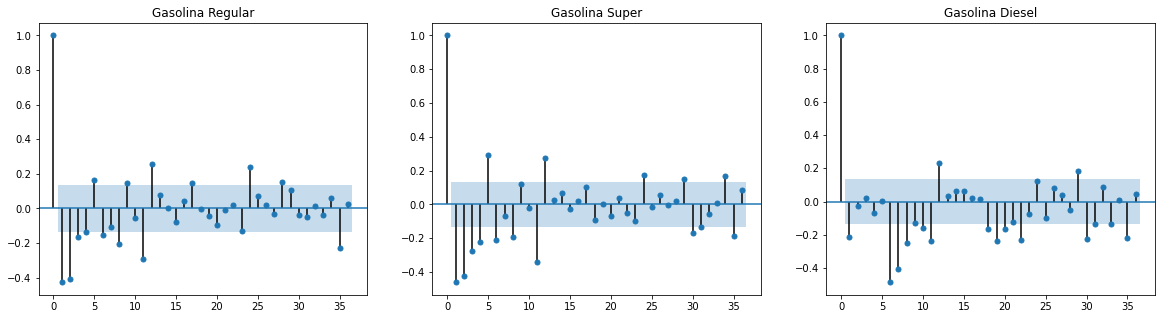

In [569]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plot_pacf(diffregularcon,  title = "Gasolina Regular",ax=axes[0], lags = 36) #p: 0
plot_pacf(diffsupercon, title = "Gasolina Super" ,ax=axes[1], lags = 36) #p: 1
plot_pacf(diffdieselcon, title = "Gasolina Diesel" ,ax=axes[2], lags = 36) #p: 1
plt.show()

### Importaciones: Autocorrelación Parcial

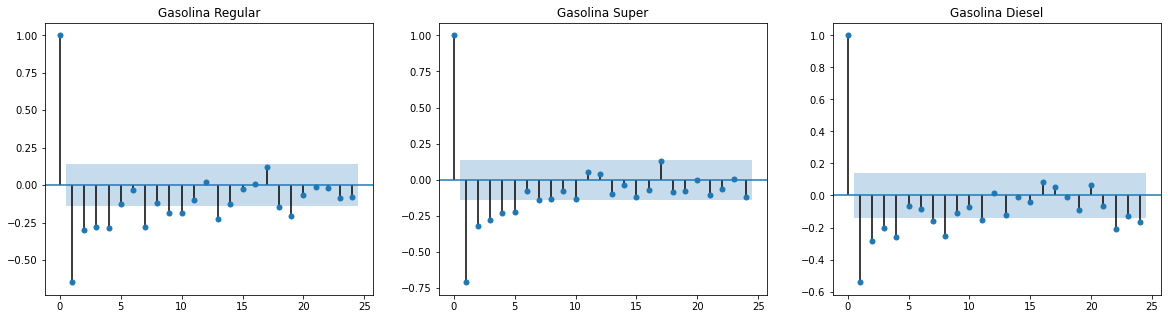

In [570]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plot_pacf(diffregularimp,  title = "Gasolina Regular",ax=axes[0]) #p: 2
plot_pacf(diffsuperimp, title = "Gasolina Super" ,ax=axes[1]) #p: 2
plot_pacf(diffdieselimp, title = "Gasolina Diesel" ,ax=axes[2]) #p: 2
plt.show()

## Para encontrar q necesitamos ver los gráficos de Autocorrelación 

### Consumo: Autocorrelación 

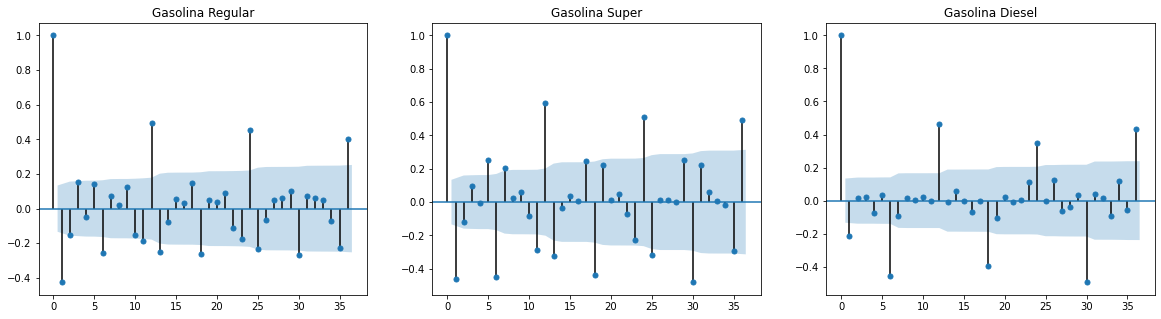

In [571]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plot_acf(diffregularcon,  title = "Gasolina Regular",ax=axes[0], lags = 36) #q: 0
plot_acf(diffsupercon, title = "Gasolina Super" ,ax=axes[1], lags = 36) #q: 2
plot_acf(diffdieselcon, title = "Gasolina Diesel" ,ax=axes[2], lags = 36) #p: 2
plt.show()

### Importaciones: Autocorrelación 

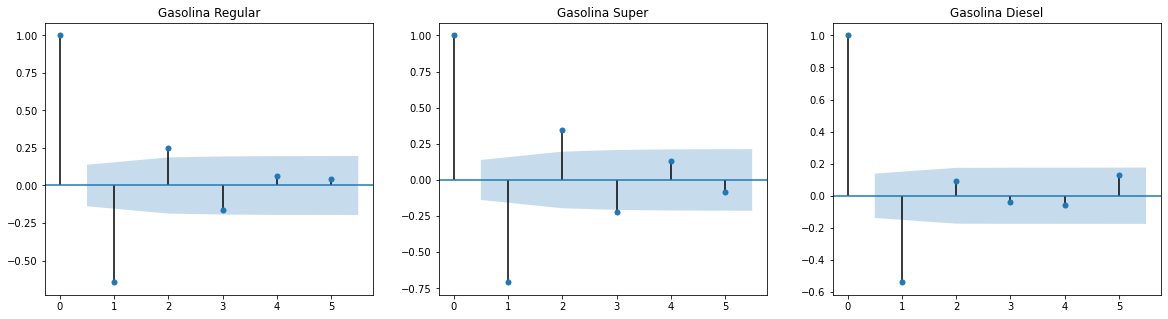

In [572]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
plot_acf(diffregularimp,  title = "Gasolina Regular",ax=axes[0], lags = 5) #q: 2
plot_acf(diffsuperimp, title = "Gasolina Super" ,ax=axes[1], lags = 5) #q: 3
plot_acf(diffdieselimp, title = "Gasolina Diesel" ,ax=axes[2], lags = 5) #q: 1
plt.show()

# Modelos Arima

### Consumo: Modelo regular

In [573]:
data_con["GasolinaRegular"] = np.exp(data_con["GasolinaRegular"]).dropna()

<ipython-input-573-869096dedde7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_con["GasolinaRegular"] = np.exp(data_con["GasolinaRegular"]).dropna()


In [574]:
modelregularcon = ARIMA(data_con["GasolinaRegular"].dropna(), order=(2,1,0))
model_fit_reg_con = modelregularcon.fit(disp=0)
print(model_fit_reg_con.summary())

                             ARIMA Model Results                              
Dep. Variable:      D.GasolinaRegular   No. Observations:                  215
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -2466.999
Method:                       css-mle   S.D. of innovations          23249.188
Date:                Wed, 04 Aug 2021   AIC                           4941.997
Time:                        22:57:57   BIC                           4955.480
Sample:                    02-01-2000   HQIC                          4947.445
                         - 12-01-2017                                         
                              coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                    1563.4379    768.473      2.034      0.042      57.258    3069.618
ar.L1.D.GasolinaRegular    -0.6516      0.063    -10.389      0.000      -0.774      -0.529


C:\Users\jiio2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'
C:\Users\jiio2\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:159: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  warnings.warn('No frequency information was'


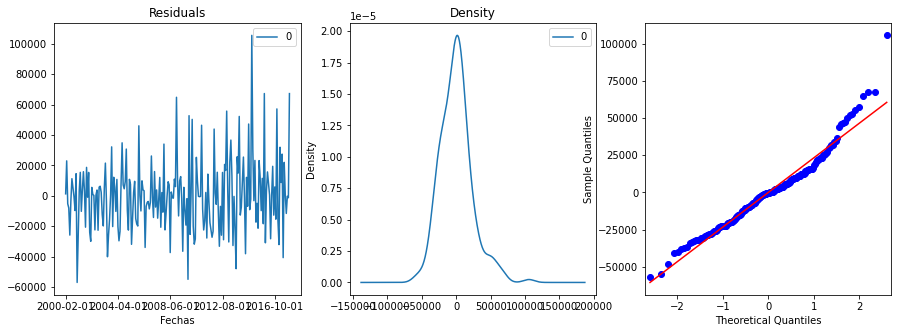

In [575]:
# Plot residual errors
residuals = pd.DataFrame(model_fit_reg_con.resid)
fig, ax = plt.subplots(1,3, figsize = (15,5))
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
sm.qqplot(residuals[0], line = "s", ax = ax[2])

plt.show()

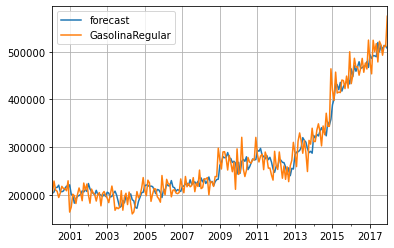

In [576]:
model_fit_reg_con.plot_predict(dynamic=False)
plt.grid()
plt.show()

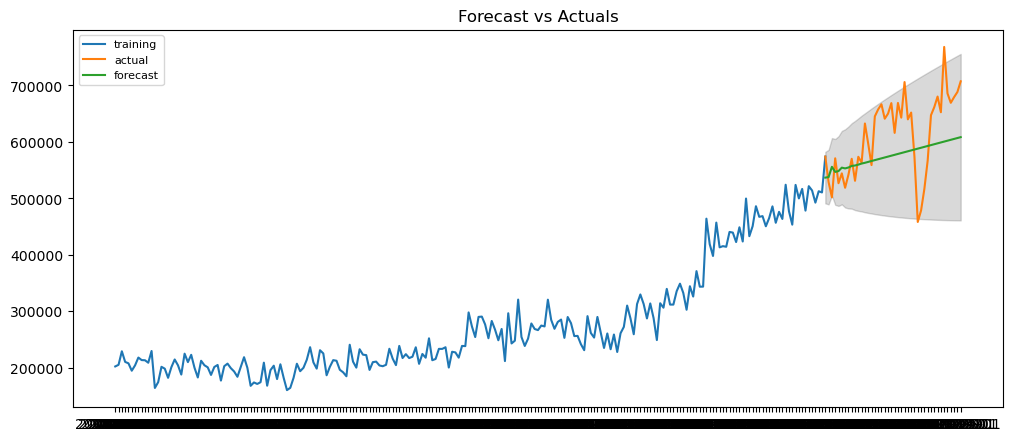

In [578]:
# Build Model
# model = ARIMA(train, order=(3,2,1))  

# Forecast
fc, se, conf = model_fit_reg_con.forecast(42, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=data_con_test["GasolinaRegular"].index)
lower_series = pd.Series(conf[:, 0], index=data_con_test["GasolinaRegular"].index)
upper_series = pd.Series(conf[:, 1], index=data_con_test["GasolinaRegular"].index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(data_con["GasolinaRegular"], label='training')
plt.plot(data_con_test["GasolinaRegular"], label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8) 
plt.show()

### Algoritmo Prophet

### Consumo: Modelo super